In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns

In [3]:
# Read in the text document and view the first five rows
clothingFile = pd.read_table('Clothing_Store',sep=',')
clothingFile.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [4]:
#Count the number of rows and columns. There are 51 features and 21,740 rows.
clothingFile.shape

(21740, 51)

#### Column Descriptions

'HHKEY' - Customer ID: unique, encrypted customer identification

'ZIP_CODE' - Zip code

'REC' - a variable showing the brand of choice (encrypted)

'FRE' - Number of purchase visits

'MON' - Total net sales

'CC_CARD' - Flag: credit card user

'AVRG' - Average amount spent per visit

'PC_CALC20',

'PSWEATERS' - percentages spent by the customer on Sweaters

'PKNIT_TOPS' - percentages spent by the customer on knit tops

'PKNIT_DRES' - percentages spent by the customer on knit dresses

'PBLOUSES' - percentages spent by the customer on blouses

'PJACKETS' - percentages spent by the customer on jackets

'PCAR_PNTS' - percentages spent by the customer on career pants

'PCAS_PNTS' - percentages spent by the customer on casual pants

'PSHIRTS' - percentages spent by the customer on shirts

'PDRESSES' - percentages spent by the customer on dresses

'PSUITS' - percentages spent by the customer on suits

'POUTERWEAR' - percentages spent by the customer on outerwear

'PJEWELRY' - percentages spent by the customer on jewelry

'PFASHION' - percentages spent by the customer on fashion

'PLEGWEAR' - percentages spent by the customer on legwear

'PCOLLSPND' - percentages spent by the customer on collectibles line

'AMSPEND' - Spending at the AM store

'PSSPEND' - Spending at the PS store

'CCSPEND' - Spending at the CC store

'AXSPEND' - Spending at the AX store

'TMONSPEND' - Amount spent in the past three months

'OMONSPEND' - Amount spent in the past month

'SMONSPEND' - Amount spent in the past six months

'PREVPD',

'GMP' - Gross margin percentage

'PROMOS' - Number of marketing promotions on file

'DAYS' - Number of days the customer has been on file

'FREDAYS' - Number of days between purchases

'MARKDOWN' - Markdown percentage on customer purchases - indicates which customers have purchased merchandise that has been marked down

'CLASSES' - Number of different product classes purchased

'COUPONS' - Number of coupons used by the customer

'STYLES' - Total number of individual items purchased by the customer

'STORES' - Number of stores the customer shopped at

'STORELOY' - Spending in the same period last year (?)

'VALPHON' - Flag: valid phone number on file

'WEB' - Flag: Web shopper

'MAILED' - Number of promotions mailed in the past year

'RESPONDED' - Number of promotions responded to in the past year

'RESPONSERATE' - Promotion response rate for the past year - indicates which customers have ever responded to a marketing promotion before

'HI' - Product uniformity (low score = diverse spending patterns)

'LTFREDAY' - Lifetime average time between visits

'CLUSTYPE' - Microvision lifestyle cluster type

'PERCRET' - Percent of returns

'RESP' - Target variable: response to promotion

My exploration will be in two sections...

In the first section, I will explore the data compared to the target variable 'RESP' - a variable showing which customers responded to the promotion, and those who did not. By focusing on the target variable 'RESP', I can get a better idea of who the responsive and active customers are. This will help the clothing store "Threads" maximize future marketing dollars by reaching out to specific customers.

The second section will be a broader exploration of Threads' customers. Providing Threads a better understanding of who their customers are will allow them to focus marketing promotions on differnt "types" of customers, and allow them to reach out to potential new customers. Customers benefit in that they receive more curated content based on their preferences.

After each plot, I will include a include a small analysis of the plot. At the end of each section I will present a larger summary of the findings as a whole.

EXPLORING RESPONSE TO PROMOTION

In [5]:
# Count how many people responded to the promotion
print(clothingFile['RESP'] != 0).sum()

3611


In [6]:
# Count how many people did not respond to the promotion
print(clothingFile['RESP'] == 0).sum()

18129


In [7]:
#Response rate to the promotion (target variable)
3611 / float(21740)

0.16609935602575898

In [8]:
#Create a dataframe of just people who responded
responded = clothingFile[clothingFile['RESP'] == 1]
responded.shape

(3611, 51)

In [9]:
#Create a dataframe of just people who did not respond to the promotion
norespond = clothingFile[clothingFile['RESP'] == 0]
norespond.shape

(18129, 51)

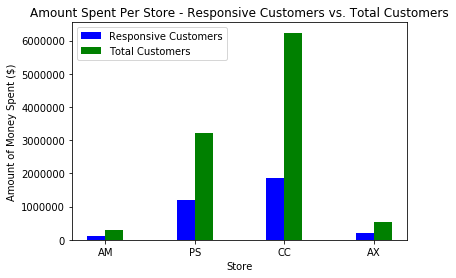

In [10]:
# Barplot showing amount spent at each store by people who responded to the promotion and total customers
# Sum amount spent by responding customers
amResp = responded['AMSPEND'].sum()
psResp = responded['PSSPEND'].sum()
ccResp = responded['CCSPEND'].sum()
axResp = responded['AXSPEND'].sum()

#Sum amount spent by total customers
amTotal = clothingFile['AMSPEND'].sum()
psTotal = clothingFile['PSSPEND'].sum()
ccTotal = clothingFile['CCSPEND'].sum()
axTotal = clothingFile['AXSPEND'].sum()

x = ['AM', 'PS', 'CC', 'AX']
y = [amResp,psResp,ccResp,axResp]
z = [amTotal,psTotal,ccTotal,axTotal]
storePlt = np.arange(len(x))

ax = plt.subplot()
ax.bar(storePlt-0.1, y,width=0.2,color='b',align='center')
ax.bar(storePlt+0.1, z,width=0.2,color='g',align='center')
plt.xlabel('Store', fontsize=10)
plt.ylabel('Amount of Money Spent ($)', fontsize=10)
plt.xticks(storePlt, x, fontsize=10)
plt.title('Amount Spent Per Store - Responsive Customers vs. Total Customers')
plt.legend(('Responsive Customers', 'Total Customers'), loc='upper left')

# save plot to word doc for report
plt.savefig('/Users/Molfer/Documents/Lisa/Springboard/Capstone 1/DataClothing/Images/amSpent.png')

plt.show()

ANALYSIS: The store preference of customers who responded to the promotion seemed to generally match the trend of the customer group as a whole. The specific store does not seem to influence response to the promotion.

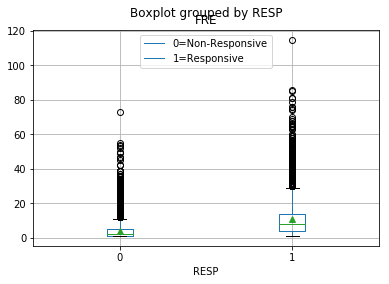

In [11]:
#Boxplot showing the number of purchase visits for customers who responded to the promotion (1) and customers who did not (0)
clothingFile.boxplot(column='FRE', by='RESP', showmeans=True)
plt.legend(('0=Non-Responsive', '1=Responsive'), loc='upper center')

plt.show()

ANALYSIS: Customers who responded to the promotion generally have more purchase visits than customers who did not respond. 

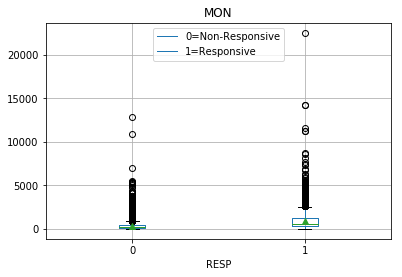

In [12]:
#Boxplot showing the range of total money spent by customers who did not respond to the promotion (0) and customers who did (1)
clothingFile.boxplot(column='MON', by='RESP', showmeans=True)
plt.legend(('0=Non-Responsive', '1=Responsive'), loc='upper center')

plt.suptitle("")

# save plot to word doc for report
plt.savefig('/Users/Molfer/Documents/Lisa/Springboard/Capstone 1/DataClothing/Images/totMoney.png')

plt.show()

ANALYSIS: Generally, customers who responded to the promotion spend more money per visit.

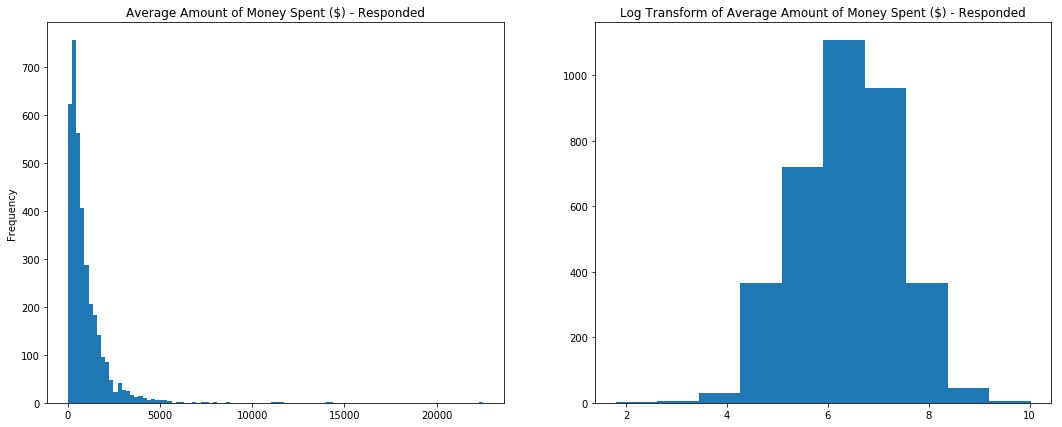

In [13]:
#Histograms showing amount of money spent per visit of customers who responded, and the log transform of the same
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.hist(responded.MON, 100)
ax1.set_title('Average Amount of Money Spent ($) - Responded')
ax1.set_ylabel('Frequency')
ax2.hist(np.log(responded.MON))
ax2.set_title('Log Transform of Average Amount of Money Spent ($) - Responded')
ax1.set_ylabel('Frequency')
plt.show()

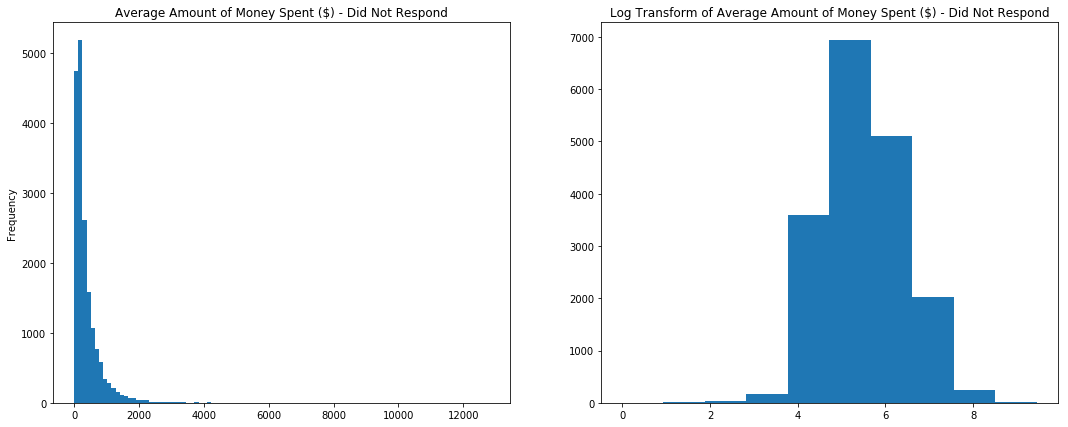

In [14]:
#Histogram showing amount of money spent per visit of customers who did not respond, and the log transform of the same
fig, (bx1, bx2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
bx1.hist(norespond.MON, 100)
bx1.set_title('Average Amount of Money Spent ($) - Did Not Respond')
bx1.set_ylabel('Frequency')
bx2.hist(np.log(norespond.MON))
bx2.set_title('Log Transform of Average Amount of Money Spent ($) - Did Not Respond')
bx1.set_ylabel('Frequency')
plt.show()

ANALYSIS: Customers who responded to the promotion generally spend more money each visit.

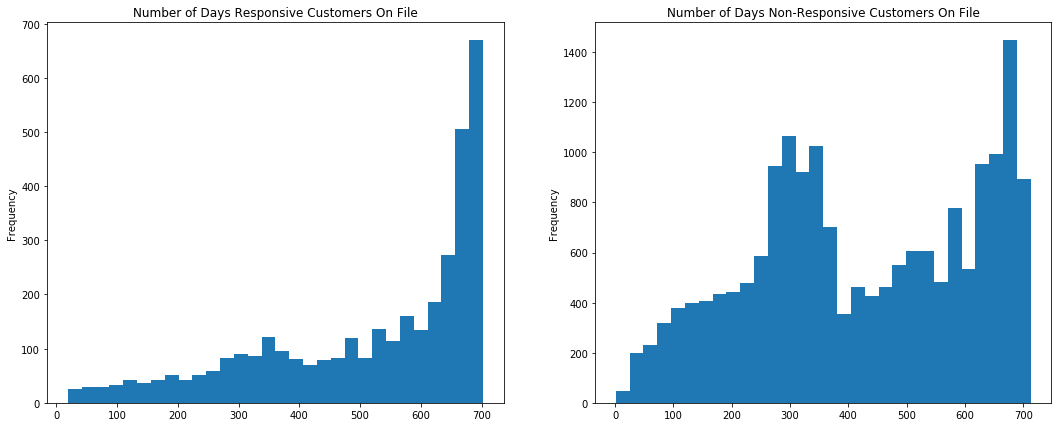

In [15]:
#Histogram showing number of days customers have been on file - Responded and Not Responded
fig, (cx1, cx2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
cx1.hist(responded.DAYS,30)
cx1.set_title('Number of Days Responsive Customers On File')
cx1.set_ylabel('Frequency')
cx2.hist(norespond.DAYS,30)
cx2.set_title('Number of Days Non-Responsive Customers On File')
cx2.set_ylabel('Frequency')
plt.show()

ANALYSIS: Customers who responded to the promotion have generally been on file with the store for a longer period of time.

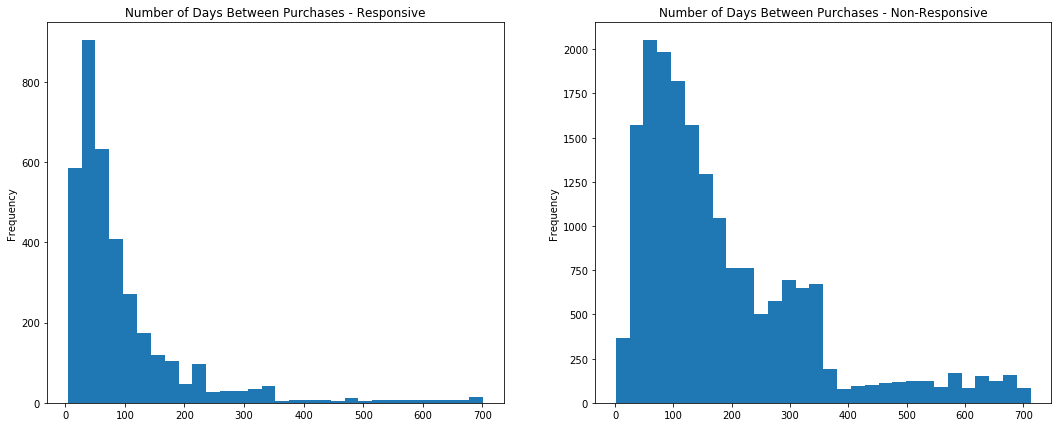

In [16]:
#Histogram showing number of days between purchases - Responded and Not Responded
fig, (dx1, dx2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
dx1.hist(responded.FREDAYS,30)
dx1.set_title('Number of Days Between Purchases - Responsive')
dx1.set_ylabel('Frequency')
dx2.hist(norespond.FREDAYS,30)
dx2.set_title('Number of Days Between Purchases - Non-Responsive')
dx2.set_ylabel('Frequency')
plt.show()

ANALYSIS: The responsive customers generally have fewer days between purchase visits.

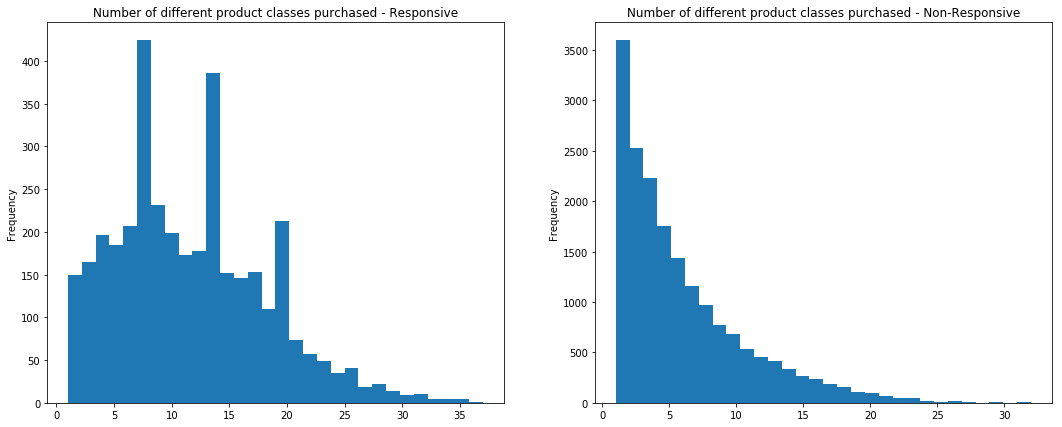

In [17]:
# Histogram showing number of different product classes purchased - Responded and Not Responded
fig, (ex1, ex2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ex1.hist(responded.CLASSES,30)
ex1.set_title('Number of different product classes purchased - Responsive')
ex1.set_ylabel('Frequency')
ex2.hist(norespond.CLASSES,30)
ex2.set_title('Number of different product classes purchased - Non-Responsive')
ex2.set_ylabel('Frequency')

# save plot to word doc for report
plt.savefig('/Users/Molfer/Documents/Lisa/Springboard/Capstone 1/DataClothing/Images/prodClass.png')

plt.show()

ANALYSIS: The responsive customers generally buy more classes of products.

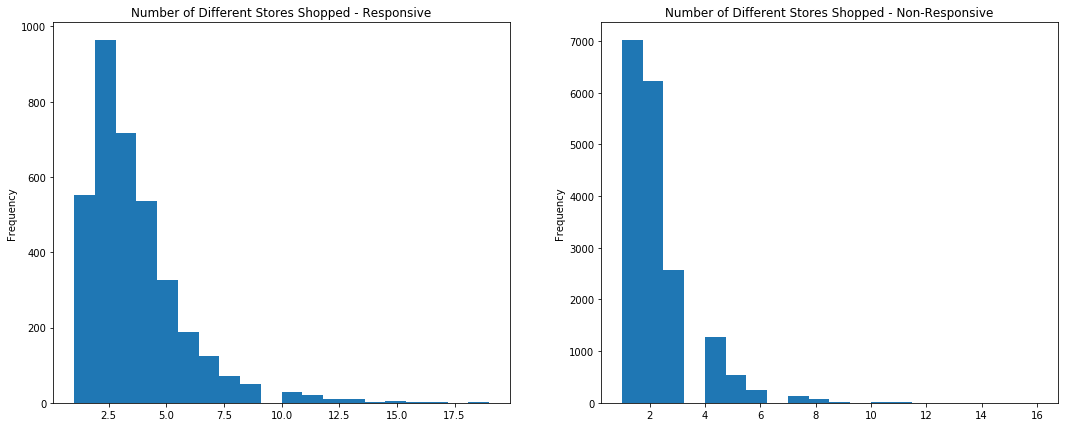

In [18]:
#Number of Stores Customer Shopped At 
fig, (fx1, fx2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fx1.hist(responded.STORES,20)
fx1.set_title('Number of Different Stores Shopped - Responsive')
fx1.set_ylabel('Frequency')
fx2.hist(norespond.STORES,20)
fx2.set_title('Number of Different Stores Shopped - Non-Responsive')
fx2.set_ylabel('Frequency')
plt.show()

ANALYSIS: There does not seem to be a significant difference in the number of stores the responsive customers shop at.

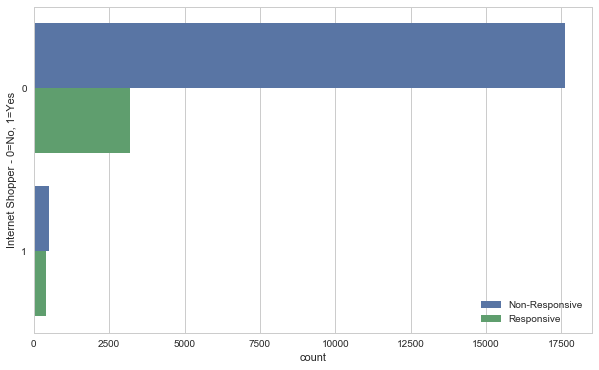

In [19]:
#Responsive/Non-responsive Internet Shoppers
sns.set(style="whitegrid", color_codes=True)

f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y="WEB", data=clothingFile, hue="RESP")
plt.ylabel('Internet Shopper - 0=No, 1=Yes')
plt.legend(('Non-Responsive', 'Responsive'), loc='lower right')
plt.show()

ANALYSIS: Customers who shop on the internet seem to have a higher rate of responsiveness to the promotion.

Overall, just under 17% of customers responded to the promotion. Responsive customers showed the following characteristics...
1. they have more purchase visits
2. they spend more money than non-responsive customers
3. they spent more money when they purchase items
4. they are long-time customers
5. they do not leave as much time between visits as non-responsive customers
6. they buy a larger range of products
7. they are often internet-shoppers

Most of these trends seemed fairly expected. They are trends that would match those of loyal shoppers. Loyal shoppers would be familiar with a brand for a long time; they trust the brand, so they would spend more money on the store. They would also check in fairly consistently as they need new items or to check if there are deals. Being an internet shopper also makes sense - customers know what they like and what size they wear in the brand. It's easier to buy online when you know what you prefer before you shop.

The trend that most surprised me above was responsive customers bought a larger range of products. It makes sense that customers would build trust for the brand with one or two categories of products to start, and then expand once they trust and like the brand. Although this was not a trend I had thought about. I am interested in digging more into the types of products customers buy and what trends are present.

EXPLORING CUSTOMER PATTERNS

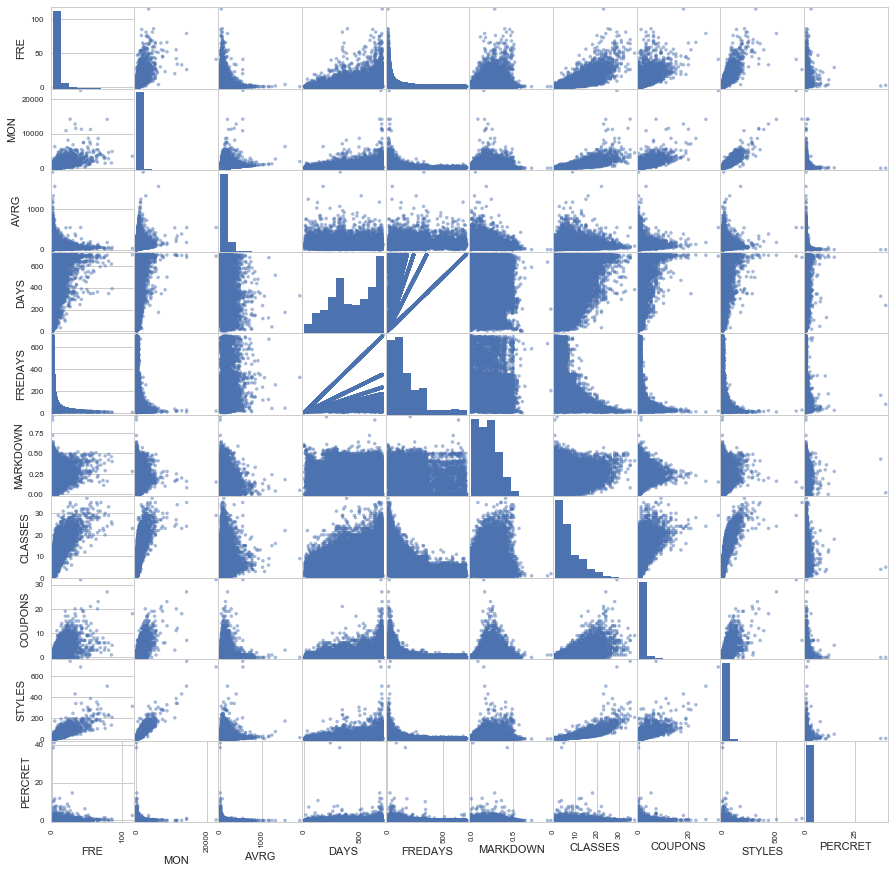

In [20]:
#'FRE' - Number of purchase visits
#'MON' - Total net sales
#'AVRG' - Average amount spent per visit
#'DAYS' - Number of days the customer has been on file
#'FREDAYS' - Number of days between purchases
#'MARKDOWN' - Markdown percentage on customer purchases - indicates which customers have purchased merchandise that has been marked down
#'CLASSES' - Number of different product classes purchased
#'COUPONS' - Number of coupons used by the customer
#'STYLES' - Total number of individual items purchased by the customer
#'PERCRET' - Percent of returns

#Plot a scatter matrix of the variables above.
pd.plotting.scatter_matrix(clothingFile[['FRE', 'MON', 'AVRG', 'DAYS','FREDAYS','MARKDOWN','CLASSES','COUPONS','STYLES','PERCRET']],alpha=0.5, figsize=(15, 15))
plt.show()

ANALYSIS: This scatter matrix has a lot of information. It may be too big to be very helpful, but can give us a general feel for the variables when compared to many others to see the correlations. I will choose several that surprised me or bring up further exploration. Some interesting observations...
1. FRE - The number of purchase visits did not have as large of an impact on total money spent (MON) as I would've thought. Up to about 10 days it seems to have an impact on how much people have spent at Threads, but after that the distribution is fairly even. The number of product classes purchased (CLASSES) has a very similar distribution when compared to  the number of purchase visits.
2. MON - The total money spent has a strong correlation to the total number of individual items purchased (STYLES). While this makes sense, it would be interesting to know the range of prices for items in the stores.
3. COUPONS - The number of coupons a customer uses can positively effect the number of product classes purchased (CLASSES).
4. PERCRET - do not show strong correlations. The percent of returns is fairly evenly spread across groups.

In [21]:
clothingFile.ZIP_CODE.unique().shape

(7419,)

In [22]:
#Look at Zip Codes
densestZip = clothingFile['ZIP_CODE'].value_counts().sort_values(ascending=False).head(20)
densestZip = densestZip.to_frame()
densestZip['zipcode'] = densestZip.index
densestZip.columns = ['count','zipcode']
densestZip

,count,zipcode
55125,51,55125
15601,42,15601
62301,38,62301
60089,38,60089
60187,36,60187
77479,33,77479
58201,32,58201
58103,30,58103
62305,28,62305
60462,27,60462


Current size: [6.0, 4.0]


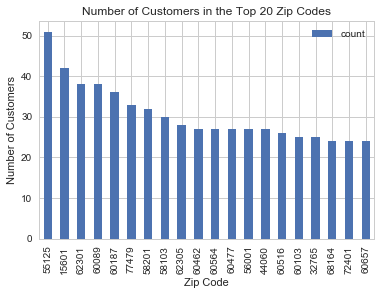

In [23]:
#Show Zipcodes
densestZip.plot.bar(x='zipcode', y='count')
plt.xlabel('Zip Code')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in the Top 20 Zip Codes')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.show()

ANALYSIS: It's surprising how many unique zip codes there are - 7419. It would be interesting to plot these on a map to better see where people are located. They look to be from many different parts of the country, but would be good to see on a map. The first two are Minnesota and Pennsylvania.

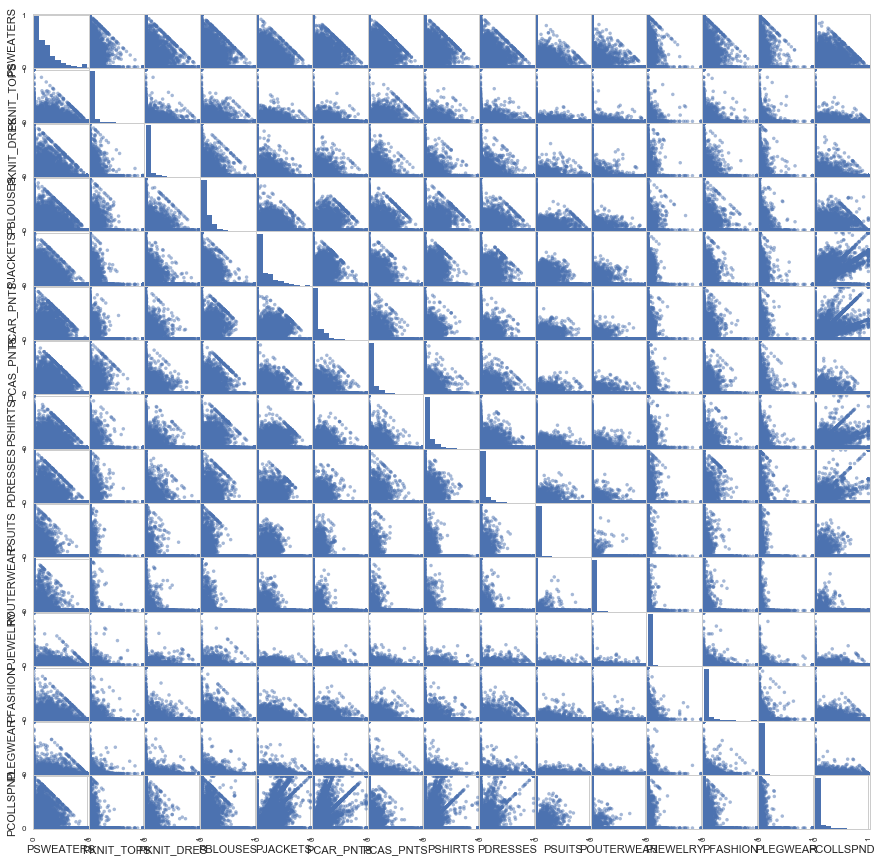

In [24]:
#Look at correlations of types of clothing
#'PSWEATERS' - percentages spent by the customer on Sweaters
#'PKNIT_TOPS' - percentages spent by the customer on knit tops
#'PKNIT_DRES' - percentages spent by the customer on knit dresses
#'PBLOUSES' - percentages spent by the customer on blouses
#'PJACKETS' - percentages spent by the customer on jackets
#'PCAR_PNTS' - percentages spent by the customer on career pants
#'PCAS_PNTS' - percentages spent by the customer on casual pants
#'PSHIRTS' - percentages spent by the customer on shirts
#'PDRESSES' - percentages spent by the customer on dresses
#'PSUITS' - percentages spent by the customer on suits
#'POUTERWEAR' - percentages spent by the customer on outerwear
#'PJEWELRY' - percentages spent by the customer on jewelry
#'PFASHION' - percentages spent by the customer on fashion
#'PLEGWEAR' - percentages spent by the customer on legwear
#'PCOLLSPND' - percentages spent by the customer on collectibles line

#Plot a scatter matrix of the variables above to see if there are patterns in what people tend to buy together.
pd.plotting.scatter_matrix(clothingFile[['PSWEATERS','PKNIT_TOPS','PKNIT_DRES','PBLOUSES','PJACKETS','PCAR_PNTS','PCAS_PNTS','PSHIRTS','PDRESSES','PSUITS','POUTERWEAR','PJEWELRY','PFASHION','PLEGWEAR','PCOLLSPND']],alpha=0.5, figsize=(15, 15))
plt.show()

ANALYSIS: There is a lot to look at with the scatter matrix above. The sweaters, jewelry, fashion and legwear do not seem to have strong correlations for any of the groups, so I will remove them to make it a bit easier to look at.

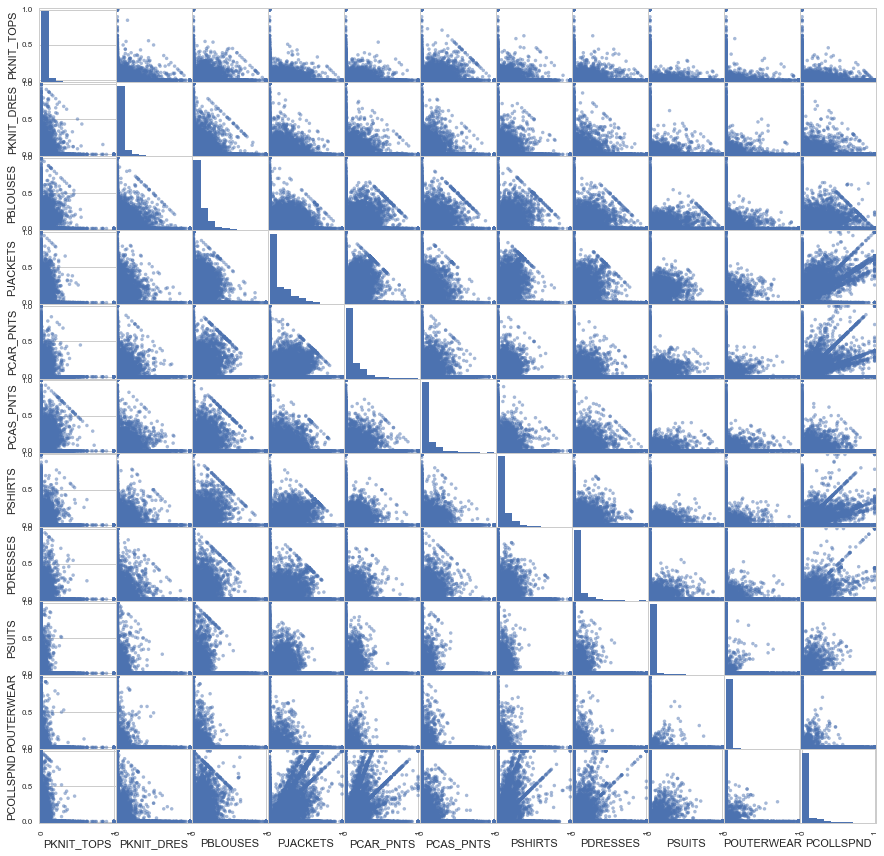

In [25]:
#Look at correlations of types of clothing
#'PKNIT_TOPS' - percentages spent by the customer on knit tops
#'PKNIT_DRES' - percentages spent by the customer on knit dresses
#'PBLOUSES' - percentages spent by the customer on blouses
#'PJACKETS' - percentages spent by the customer on jackets
#'PCAR_PNTS' - percentages spent by the customer on career pants
#'PCAS_PNTS' - percentages spent by the customer on casual pants
#'PSHIRTS' - percentages spent by the customer on shirts
#'PDRESSES' - percentages spent by the customer on dresses
#'PSUITS' - percentages spent by the customer on suits
#'POUTERWEAR' - percentages spent by the customer on outerwear
#'PCOLLSPND' - percentages spent by the customer on collectibles line

#Plot a scatter matrix of the variables above to see if there are patterns in what people tend to buy together.
pd.plotting.scatter_matrix(clothingFile[['PKNIT_TOPS','PKNIT_DRES','PBLOUSES','PJACKETS','PCAR_PNTS','PCAS_PNTS','PSHIRTS','PDRESSES','PSUITS','POUTERWEAR','PCOLLSPND']],alpha=0.5, figsize=(15, 15))

# save plot to word doc for report
plt.savefig('/Users/Molfer/Documents/Lisa/Springboard/Capstone 1/DataClothing/Images/clothType.png')

plt.show()

ANALYSIS: Suits and outerwear seem to be correlated. As people have a higher percentage of suit purchases, they also have a higher percentage of outerwear. The Collectibles Line also seems to be correlated to jackets, career pants, shirts, dresses, suits and outerwear. It would be interesting to know what is in the Collectibles line and if this is something to explore. I'm surprised there are not stronger correlations - I was expecting to see suits and blouses correlated, or shirts and pants, but I do not see these patterns.

In [26]:
#Get mean of the percentages of each type of clothing
sweaters = clothingFile['PSWEATERS'].mean()
knittops = clothingFile['PKNIT_TOPS'].mean()
knitdresses = clothingFile['PKNIT_DRES'].mean()
blouses = clothingFile['PBLOUSES'].mean()
jackets = clothingFile['PJACKETS'].mean()
careerpants = clothingFile['PCAR_PNTS'].mean()
casualpants = clothingFile['PCAS_PNTS'].mean()
shirts = clothingFile['PSHIRTS'].mean()
dresses = clothingFile['PDRESSES'].mean()
suits = clothingFile['PSUITS'].mean()
outerwear = clothingFile['POUTERWEAR'].mean()
jewelry = clothingFile['PJEWELRY'].mean()
fashion = clothingFile['PFASHION'].mean()
legwear = clothingFile['PLEGWEAR'].mean()
collection = clothingFile['PCOLLSPND'].mean()

In [27]:
#Create a Dataframe of the mean percentages for each type of clothing
objectList = ['sweaters', 'knittops', 'knitdresses', 'blouses', 'jackets', 'careerpants','casualpants','shirts','dresses','suits','outerwear','jewelry','fashion','legwear','collection']
percentItems = [sweaters,knittops,knitdresses,blouses,jackets,careerpants,casualpants,shirts,dresses,suits,outerwear,jewelry,fashion,legwear,collection]
clothingTypes = pd.DataFrame(
    {'Clothing_Type': objectList,
     'Percent': percentItems
    })
ctSorted = clothingTypes.sort_values(by=['Percent'],ascending=False)
ctSorted

,Clothing_Type,Percent
0,sweaters,0.213665
4,jackets,0.135575
3,blouses,0.093482
5,careerpants,0.086004
14,collection,0.072666
6,casualpants,0.069286
8,dresses,0.068392
7,shirts,0.066285
2,knitdresses,0.041295
9,suits,0.034135


Current size: [16.0, 12.0]


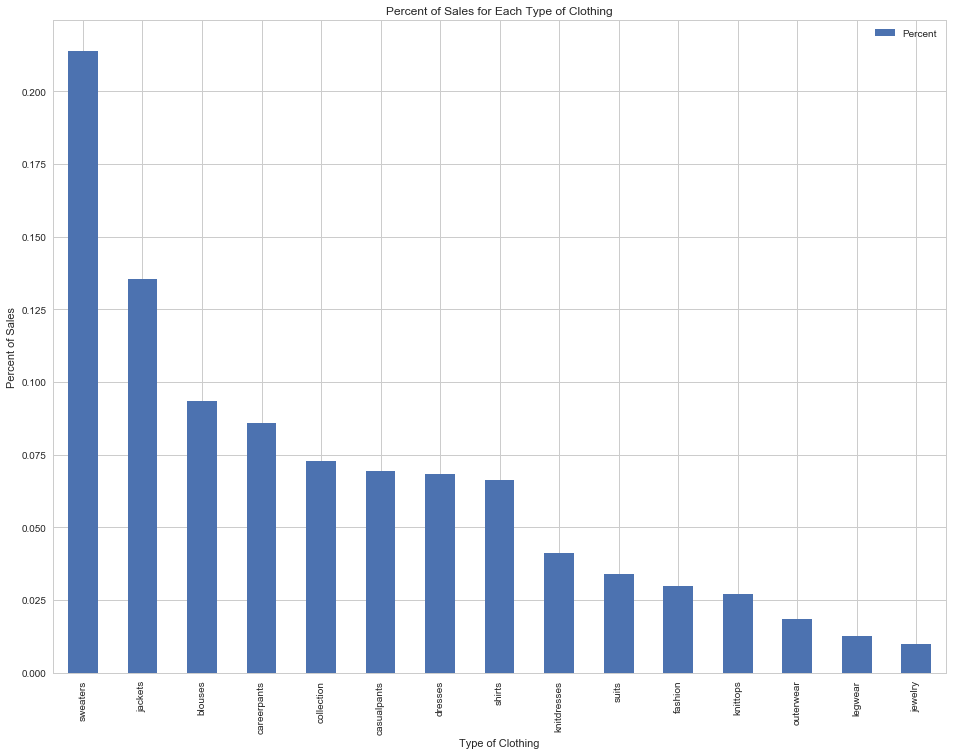

In [28]:
# Percent of Sales for Each Type of Clothing
ctSorted.plot.bar(x='Clothing_Type', y='Percent')
plt.xlabel('Type of Clothing')
plt.ylabel('Percent of Sales')
plt.title('Percent of Sales for Each Type of Clothing')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# save plot to word doc for report
plt.savefig('/Users/Molfer/Documents/Lisa/Springboard/Capstone 1/DataClothing/Images/perSales.png')

plt.show()

ANALYSIS: Sweaters and jackets are the largest portion of sales, followed by blouses and careerpants.

OVERALL ANALYSIS: It would be interesting to dig deeper into the zip code data to get a better idea of where the customers live. This could give some context to why jackets and sweaters are the biggest sellers - customers are most likely in cold areas. I would also be curious to know if they are near major metropolitan areas. Because there are many stores, you would assume they are near larger cities, but also blouses and careerpants are some of the top sellers. I would also look more into the last one/three/six months of sales. The time data may give a better picture also of weather patterns, etc. and if the data is skewed because of the time of year.

With the zip codes being from many different parts of the country, it seems there would be many stores. The most loyal customers (have been on file longest, shop frequently, etc.) seem to be the ones who are the most repsonsive to the promotion. Targeting this group a bit more to see more detail may help future promotions.

Also, understanding more about customers' lifestyles would help. There is a variable CLUSTYPE in the dataset that references the Claritas Dataset, but I could not find specific information on Cluster definitions.